<a href="https://colab.research.google.com/github/hoonzi-s/hongong_MLDL/blob/main/04-1.%20%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()   # 상위 5개 행 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [25]:
# 어떤 종류의 생선이 있는지 확인
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [26]:
# Species 열을 타깃, 나머지 열은 입력 데이터로 사용
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [27]:
fish_target = fish['Species'].to_numpy()

In [28]:
from sklearn.model_selection import train_test_split as tts
train_input, test_input, train_target, test_target = tts(fish_input, fish_target, random_state = 42)

In [29]:
# 훈련 데이터의 통계 값으로 테스트 세트를 변환해야 함
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [31]:
# 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 정렬됨.
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [32]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [33]:
# 클래스별 확률값 반환하는 predict_proba 메소드
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals = 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [34]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

# 로지스틱 회귀

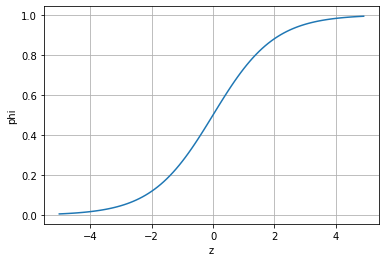

In [35]:
# 시그모이드 함수 구현
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.grid()
plt.show()

In [36]:
# 로지스틱 회귀로 이진 분류 수행하기
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
char_arr[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

In [37]:
# 도미와 빙어 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')   # 비트 OR 연산자로 도미와 빙어에 대한 행만 골라내기
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [43]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [44]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [46]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [47]:
print(f'coeffs = {lr.coef_}\nintercept = {lr.intercept_}')

coeffs = [[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]]
intercept = [-2.16155132]


In [50]:
# train_bream_smelt의 처음 5개 샘플의 z값 출력해보기
decisions = lr.decision_function(train_bream_smelt[:5])       # 양성(1, 빙어) 클래스에 대한 z값을 반환함
decisions   

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [51]:
# 사이파이 라이브러리의 시그모이드 함수 expit()
# np.exp()보다 훨씬 편리하고 안전함

from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [53]:
# max_iter 매개변수: 반복횟수. 기본값 100
## C 규제 매개변수: 기본값 1. 커지면 규제 완화

lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [57]:
print(lr.classes_)
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [58]:
lr.coef_

array([[-1.49002087, -1.02912886,  2.59345551,  7.70357682, -1.2007011 ],
       [ 0.19618235, -2.01068181, -3.77976834,  6.50491489, -1.99482722],
       [ 3.56279745,  6.34357182, -8.48971143, -5.75757348,  3.79307308],
       [-0.10458098,  3.60319431,  3.93067812, -3.61736674, -1.75069691],
       [-1.40061442, -6.07503434,  5.25969314, -0.87220069,  1.86043659],
       [-1.38526214,  1.49214574,  1.39226167, -5.67734118, -4.40097523],
       [ 0.62149861, -2.32406685, -0.90660867,  1.71599038,  3.6936908 ]])

In [59]:
lr.intercept_

array([-0.09205179, -0.26290885,  3.25101327, -0.14742956,  2.65498283,
       -6.78782948,  1.38422358])

In [61]:
# softmax 함수는 각 클래스별로 z값을 각각 계산함
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


from scipy.special import softmax

proba = softmax(decision, axis = 1)   # axis 1. 각 행, 즉 각 샘플에 대해 소프트맥스 계산
print(np.round(proba, decimals = 3))

In [68]:
proba

array([[7.24961303e-06, 1.35113544e-02, 8.41280791e-01, 3.14311961e-04,
        1.35663106e-01, 6.67133148e-03, 2.55185525e-03],
       [7.15013527e-09, 2.55559164e-03, 4.39081448e-02, 3.37969027e-05,
        7.30963250e-03, 9.46187572e-01, 5.25504073e-06],
       [1.86546925e-05, 2.79633877e-06, 3.40588253e-02, 9.34807145e-01,
        1.50474915e-02, 1.60354257e-02, 2.96612048e-05],
       [1.09322545e-02, 3.40492399e-02, 3.05540830e-01, 6.60883138e-03,
        5.66581908e-01, 6.87230021e-05, 7.62182140e-02],
       [4.48965927e-06, 3.67273843e-04, 9.04005222e-01, 2.41270531e-03,
        8.94718413e-02, 2.40963187e-03, 1.32883574e-03]])